In [111]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'perf_df.pickle'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

df = pd.DataFrame(data)
# print(df)

In [112]:
# filter for full mode
filtered_df = df[(df['dataset'] == 'SIFT1M') &
                 (df['max_degree'] == 64) &
                 (df['mode'] == "full") &
                 (df['sub_graph_num'] == "1") ]

# print(filtered_df)

# refer: ef: [4, 8, 12, 16, 24, 32, 48, 64, 80, 96, 112, 128]  

# gather the recall_10 values for each element in the filtered_df
full_recall_10 = []
full_node_counter = []
for index, row in filtered_df.iterrows():
    full_recall_10.append(row['recall_10'])
    full_node_counter.append(row['node_counter'])

full_node_counter = full_node_counter[2:]
full_recall_10 = full_recall_10[2:]

# find the first element that has recall_10 > 0.9
for i in range(len(full_recall_10)):
    if full_recall_10[i] > 0.95:
        print(i)
        break

full_recall_10 = full_recall_10[i:]
full_node_counter = full_node_counter[i:]

print(full_recall_10)
print(full_node_counter)

4
[0.9666, 0.98018, 0.9868, 0.99081, 0.99346, 0.99529, 0.9973, 0.9983, 0.99903]
[1269, 1609, 1937, 2254, 2563, 2862, 3441, 3996, 5053]


In [113]:
# filter for sub mode
sub_graph_num_list = [2, 4, 8, 16]
sub_recall_10 = []
sub_node_counter = []

for sub_graph_num in sub_graph_num_list:

    filtered_df = df[(df['dataset'] == 'SIFT1M') &
                    (df['max_degree'] == 64) &
                    (df['mode'] == "sub") &
                    (df['sub_graph_num'] == sub_graph_num) ]

    recall_10 = []
    node_counter = []
    for index, row in filtered_df.iterrows():
        recall_10.append(row['recall_10'])
        node_counter.append(row['node_counter'])

    # find the last element that has node_counter < 10000
    for i in range(len(recall_10)-1, -1, -1):
        if node_counter[i] < 20000:
            print(i, end=' ')
            break
    
    # find the first element that has recall_10 > 0.95
    for j in range(len(recall_10)):
        if recall_10[j] > 0.95:
            print(j)
            break
    
    recall_10 = recall_10[j:i]
    node_counter = node_counter[j:i]
    
    sub_recall_10.append(recall_10)
    sub_node_counter.append(node_counter)



14 5
11 4
11 3
7 2


In [114]:
# filter for sub mode
sub_graph_num_list = [2, 4, 8, 16]
sub_recall_10 = []
sub_node_counter = []
j_i = [(14, 5), (12, 4), (10, 3), (8, 2)]

for k in range(len(sub_graph_num_list)):

    sub_graph_num = sub_graph_num_list[k]
    filtered_df = df[(df['dataset'] == 'SIFT1M') &
                    (df['max_degree'] == 64) &
                    (df['mode'] == "sub") &
                    (df['sub_graph_num'] == sub_graph_num) ]

    recall_10 = []
    node_counter = []
    for index, row in filtered_df.iterrows():
        recall_10.append(row['recall_10'])
        node_counter.append(row['node_counter'])

    recall_10 = recall_10[j_i[k][1]:j_i[k][0]]
    node_counter = node_counter[j_i[k][1]:j_i[k][0]]
    
    sub_recall_10.append(recall_10)
    sub_node_counter.append(node_counter)

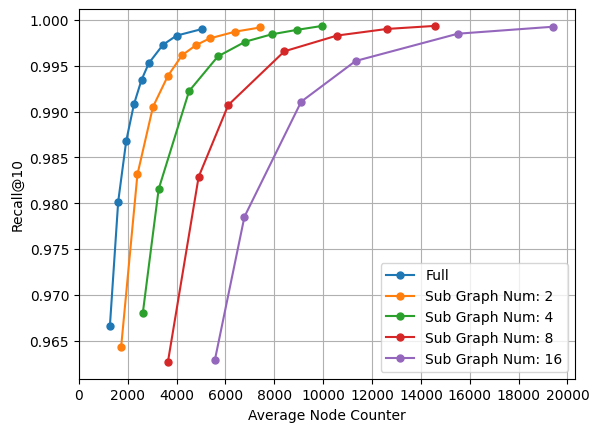

In [115]:
ax = plt.figure()

plt.plot(full_node_counter, full_recall_10, label='Full', marker='o', linestyle='-', markersize=5)

for node_counter, recall_10, sub_graph_num in zip(sub_node_counter, sub_recall_10, sub_graph_num_list):
    plt.plot(node_counter, recall_10, label='Sub Graph Num: ' + str(sub_graph_num), marker='o', linestyle='-', markersize=5)


plt.xlabel('Average Node Counter')
plt.ylabel('Recall@10')
# plt.yticks(np.arange(0.95, 1, 0.005))
plt.xticks(np.arange(0, 21000, 2000))

# plt.title('Recall@10 vs. Node Counterrent ef Values for Diffe')
plt.legend()
plt.grid(True)
plt.show()